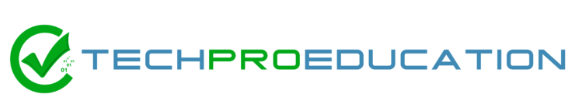

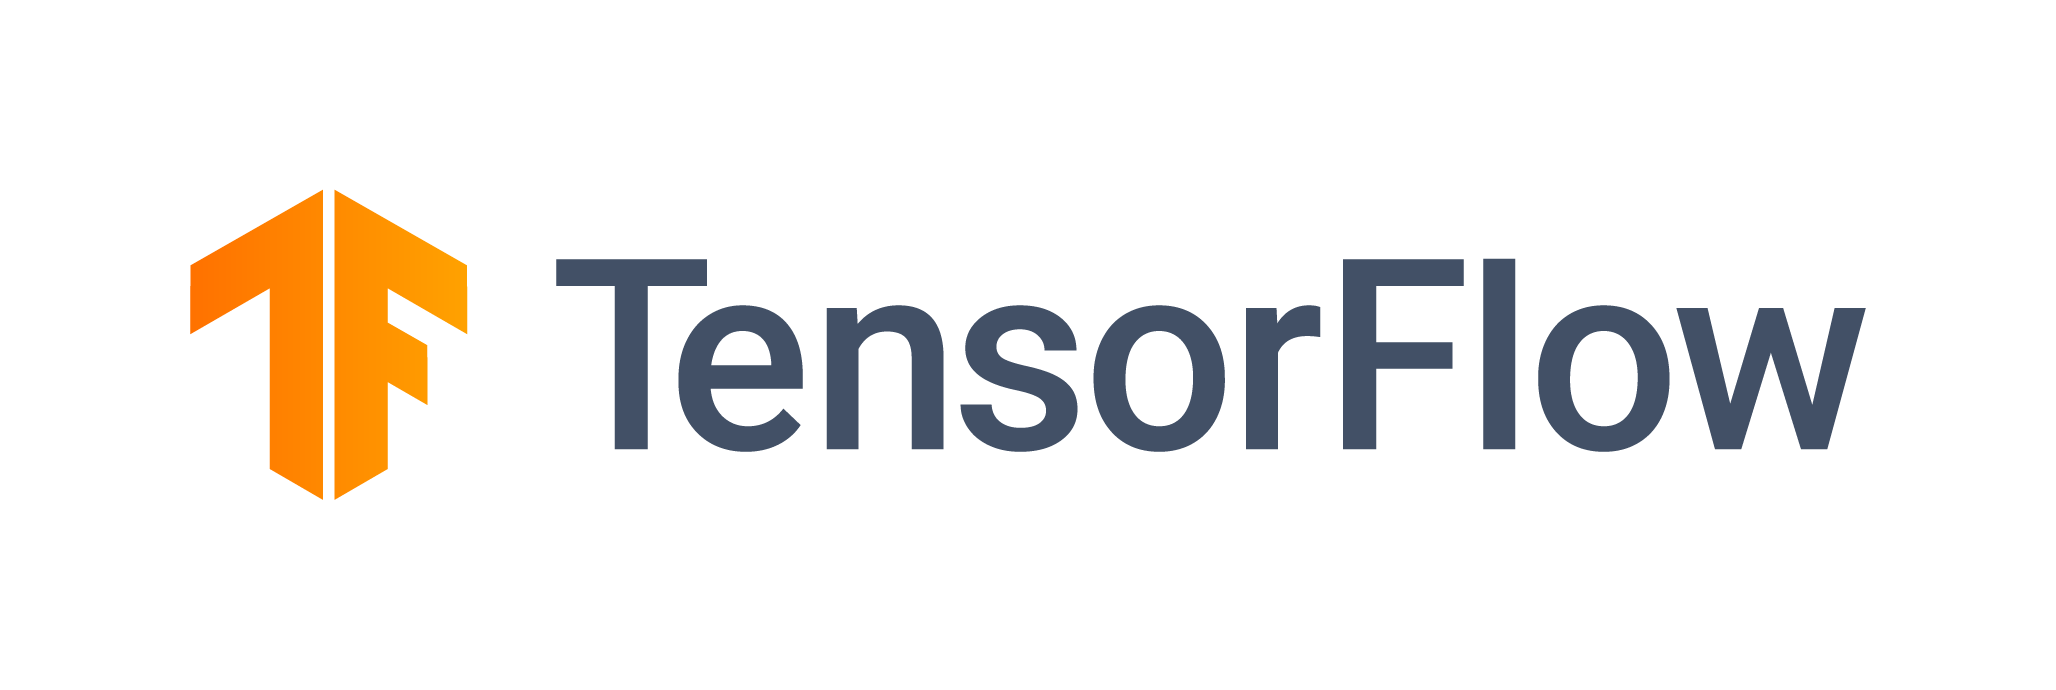

**TensorFlow** is an open-source deep learning library developed and maintained by Google. It offers data flow programming that performs a series of machine learning tasks.

TensorFlow’s flexible structure enables computations to be performed on all platforms through a single API (Application Programming Interface).

TensorFlow utilizes one or more central processing units (CPUs) and graphics processing units (GPUs) to execute activation and deployment processes. Although TensorFlow was originally developed using the Python programming language, it is now known to support many other programming languages, such as C++, Java, C#, and JavaScript.

With JavaScript support, many tasks related to artificial intelligence can also be performed through web browsers using TensorFlow.js.

**KERAS** is an Open Source Neural Network library written in Python that runs on top of Theano or TensorFlow. It is designed to be modular, fast, and easy to use. Developed by François Chollet, a Google engineer, it is a useful library for creating any deep learning algorithm.

# Installing Tensorflow

In [1]:
# pip install keras

In [2]:
# pip install tensorflow

In [3]:
import tensorflow as tf
tf.__version__

'2.16.1'

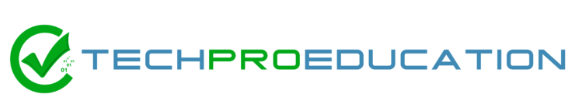

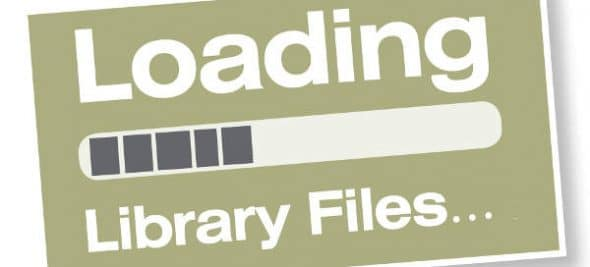

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show") 

# Applies a warning filter to hide warning messages. 
# This prevents warning messages from appearing when running the code.

plt.rcParams["figure.figsize"] = (10,6)
# Sets the figure size for plots in the Matplotlib library. 
# Here, (10,6) specifies a frame size with a width of 10 and a height of 6 units.

sns.set_style("whitegrid")
# Sets the grid style in the Seaborn library to a white background.

pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Sets the float format in the pandas library. 
# Here, it uses a lambda function to specify the display format of decimal numbers.

pd.set_option('display.max_rows', None)
# Sets the display.max_rows option to None, allowing all rows in dataframes to be displayed.

pd.set_option('display.max_columns', None)
# Sets the display.max_columns option to None, allowing all columns in dataframes to be displayed.


In [5]:
df = pd.read_csv("fake_reg.csv")

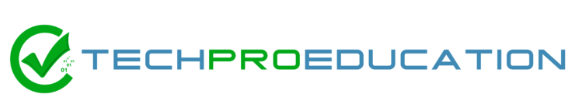

## Exploratory Data Analysis and Visualization

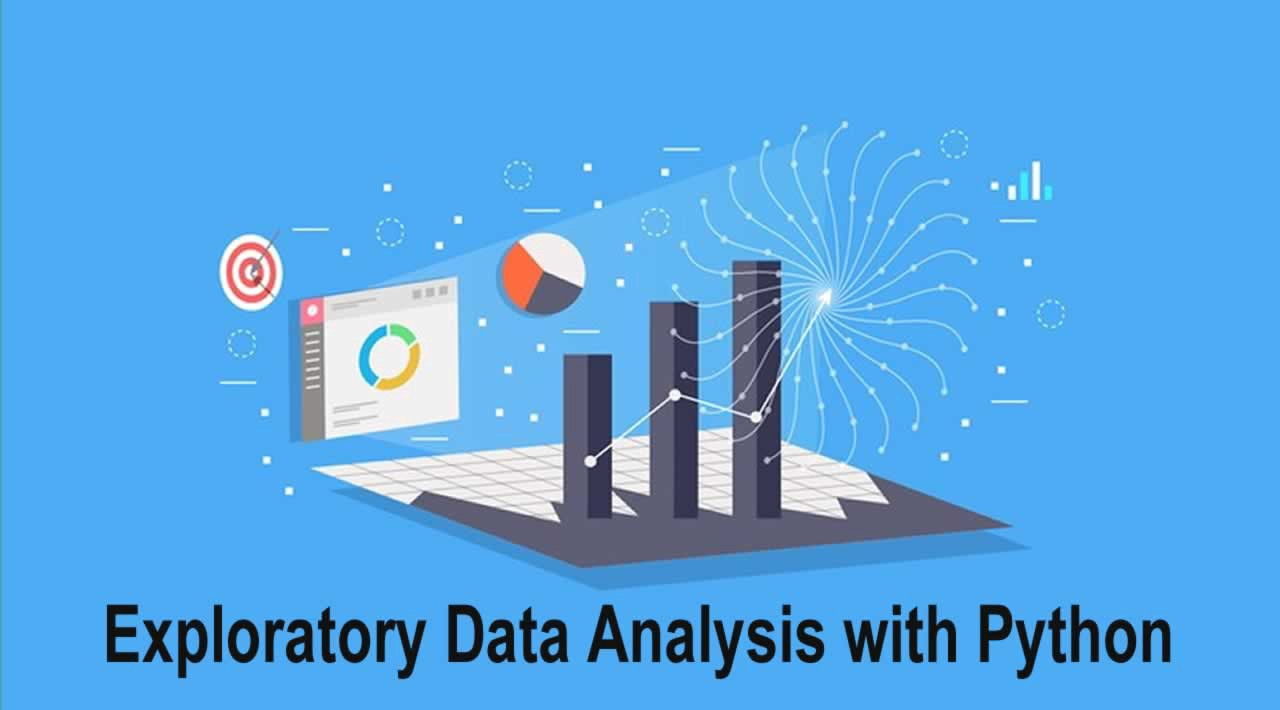

In [6]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [7]:
df.tail()

,price,feature1,feature2
995,476.526,1000.019,999.673
996,457.313,998.855,1000.020
997,456.721,1001.452,998.848
998,403.316,1000.771,998.563
999,599.367,999.232,1001.451


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [9]:
df.describe()

,price,feature1,feature2
count,1000.000,1000.000,1000.000
mean,498.673,1000.014,999.980
std,93.785,0.974,0.948
min,223.347,997.058,996.996
25%,433.026,999.332,999.316
50%,502.382,1000.010,1000.002
75%,564.922,1000.638,1000.645
max,774.408,1003.208,1002.666


In [10]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


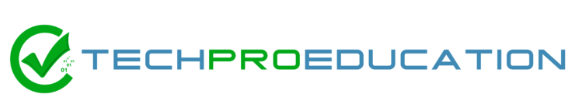

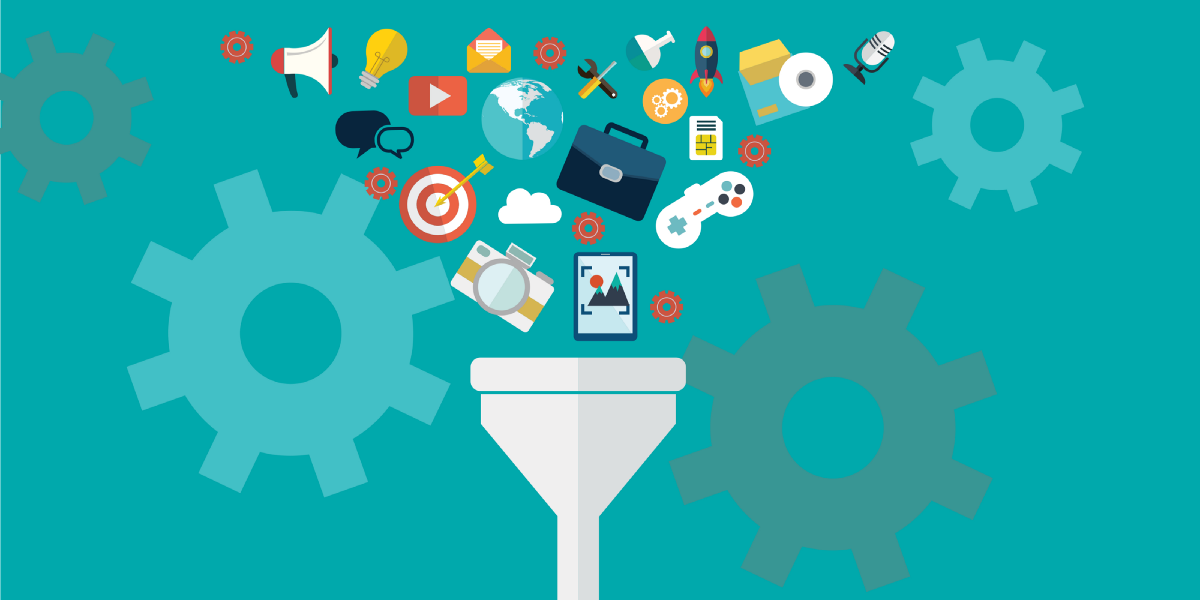

## Preprocessing of Data
- Train | Test Split, Scalling

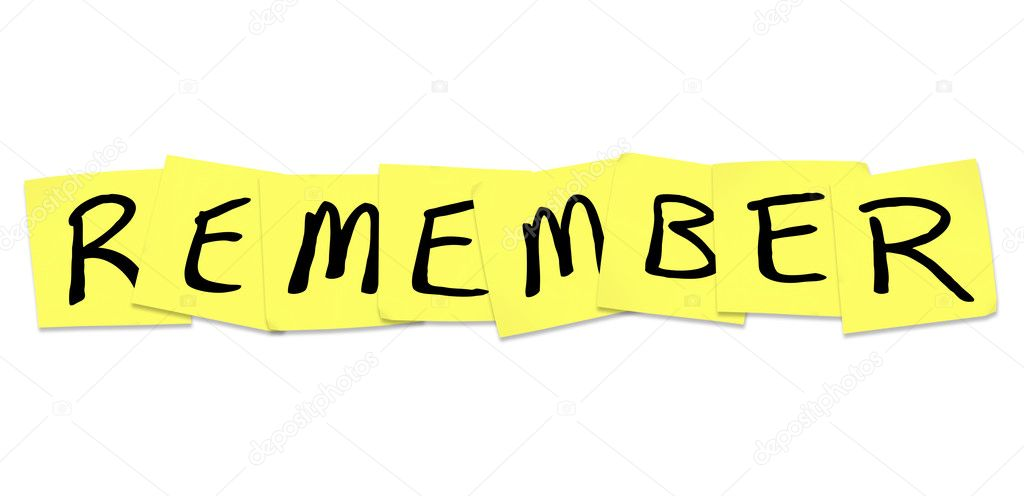

**NumPy** is a library used for managing multi-dimensional arrays. NumPy is specifically optimized for mathematical operations and can work efficiently with large datasets. NumPy arrays compress data to minimize memory usage and are optimized for very fast processing.

**DataFrame** is a structure used for handling tabular data. It is provided by the Pandas library. A DataFrame organizes data into rows and columns and stores the data with labels. DataFrame is useful for many data processing tasks, especially for filtering, sorting, merging, grouping, and transforming data in various ways.

**The differences between DataFrame and NumPy arrays are as follows:**

- While DataFrame stores data with labels, NumPy arrays store data sequentially.
- DataFrame can store data in columns of different types, whereas NumPy arrays store data of the same type.
  
Many data scientists typically use DataFrame for data preprocessing tasks, while they prefer to use NumPy arrays for model training and prediction (because they can be processed faster and more efficiently).

Artificial Neural Networks (ANNs) frequently use NumPy arrays as input, and therefore, converting columns from a DataFrame to a NumPy array is necessary to provide the data as input to a neural network model.

However, other machine learning models (e.g., decision trees or support vector machines) can work directly on a DataFrame, so you don't have to convert the data into a NumPy array. Therefore, what you need to do depends on your data structure and the machine learning model you're using.

In [12]:
from sklearn.model_selection import train_test_split

**X = df[['feature1', 'feature2']].values  
y = df['price'].values**

With the **"values"** operation above, we perform the NumPy array conversion. However, this conversion is done automatically with **train_test_split** and **scaling** operations. Since we will train the model with X without separating the train and test in the final model, we can perform this NumPy conversion here in advance.

In [13]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [14]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [15]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_test.shape

(300, 2)

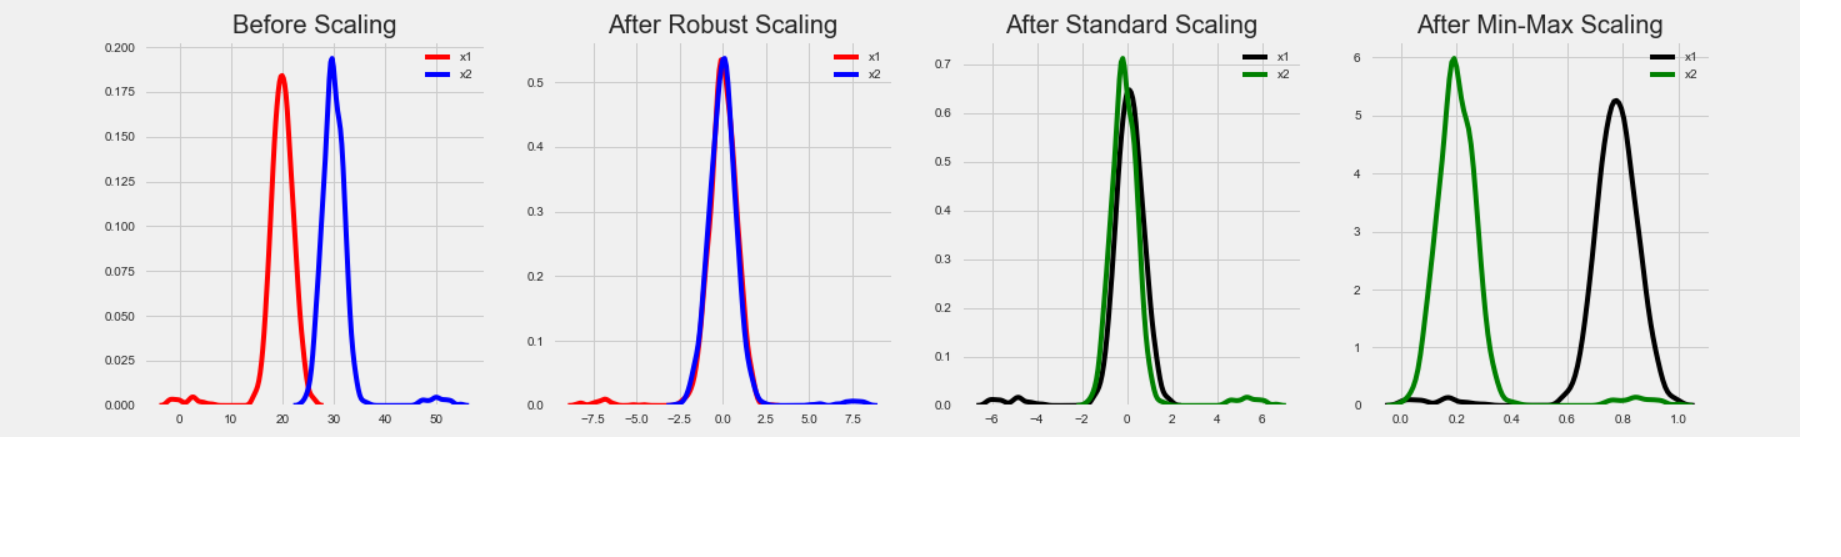

**Min-Max Scaler:** This method scales the data to a specific range. It is done by scaling the data between the minimum and maximum values within a defined range. This method is typically used to scale data between 0 and 1.

**Standard Scaler:** This method scales the data so that the mean is 0 and the standard deviation is 1. It is done by centralizing the distribution of the data. This method is commonly used when the data is normally distributed.

**Robust Scaler:** This method scales the data by setting the median to 0 and reducing the percentile range to a specific range. It also centralizes the distribution of the data. This method is used when there are outliers in the data.

**Note==>** In most of our deep learning (DL) work, we prefer using the Min-Max Scaler. This is because we keep input values with heavy processing load between 0-1.

In [19]:
from sklearn.preprocessing import MinMaxScaler 

In [20]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [21]:
scaler = MinMaxScaler() 

In [22]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train.max()

1.0

In [24]:
X_train.min()

0.0

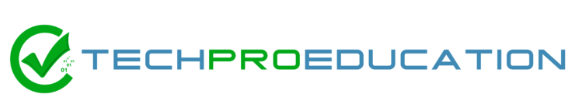

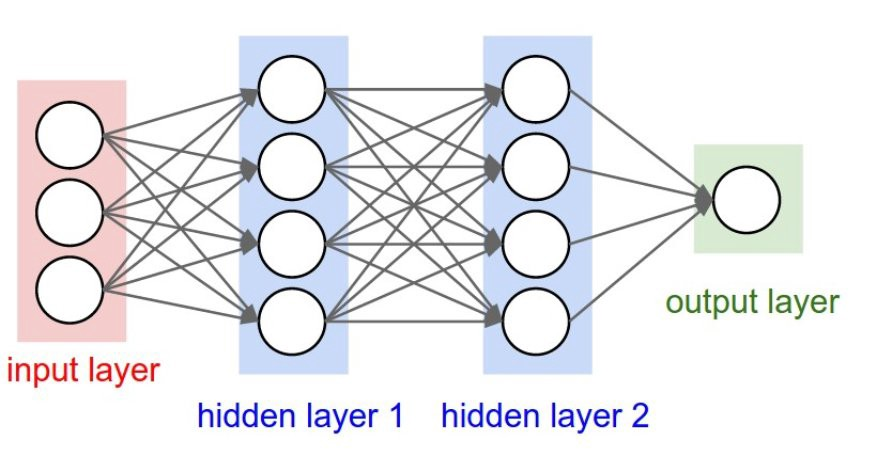

## Modelling

In [25]:
import tensorflow as tf

In [26]:
from keras import models # tensorflow uses keras as it's infrastructure

In [27]:
from tensorflow.keras.layers import Dense, Activation

In [28]:
from tensorflow.keras.models import Sequential


In [29]:
help(Sequential) # arka arkaya katman oluşturmamı sağlayan yapıdır. ilk olarak modeli squental olarak tanımlarız.

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |  
 |  # When using the delayed-build 

In [30]:
help(Dense) # layer

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).

The **Sequential** class is used to add layers to a model in a sequential manner. In this way, the output of each layer can be used as the input to the next layer, making model creation easier.

**Dense**, on the other hand, is a class used to create a fully connected layer. Fully connected layers are layers where all the outputs from the previous layer are passed as inputs to the next layer.

In summary, the Sequential class is used to add layers to a model sequentially, while the Dense class is used to create a fully connected layer. In the Sequential class, each layer can be created using the Dense class.

In [31]:
# First way to create model

model = Sequential([Dense(units = 4, input_dim=2, activation = "relu"),  # each Dense defines a layer
                    Dense(units = 4, activation = "relu"),               # units specify how many neurons there are
                    Dense(units = 4, activation = "relu"),               # activation function is ReLU, but tanh can also be chosen
                    Dense(units = 1)])                                   # output layer - since it's a regression problem, there is 1 output.
# don't have to mention input_dim

**input_dim** is a parameter used to specify how many input variables (inputs) there are in the first layer of a neural network model. Here, we provided the input number because we know it, but if we didn't, the model could detect it automatically.

**units** specifies the number of neurons. There's no strict rule, but it's recommended to follow a pattern like 4, 8, 16, 32, 64, 128... to follow best practices.

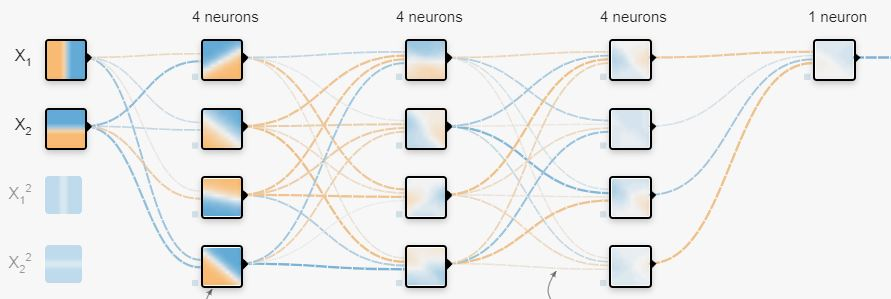

In [32]:
# Second way to create model (The recommended format)

model = Sequential()
model.add(Dense(units = 8, input_dim = X_train.shape[1], activation = "relu"))     
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1))                             

The number of columns in the X_train dataset, meaning the number of features, is assigned to the **input_dim** variable. This means that each data sample entering the model will be a vector of size **input_dim**. In this way, the model knows that it is receiving a vector of the expected size as input, and it processes these vectors to produce an output. The expression **X_train.shape[1]** returns a NumPy array that gives the shape of the X_train dataset as (n_samples, n_features). Here, **n_features** represents the number of features, and **X_train.shape[1]** is equal to this value.

In [33]:
# Third way without input_dim

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1)) 

In [34]:
model.compile(optimizer="rmsprop", loss="mse")

# The model has been built, and here we define how it will operate
# The optimizer finds the minimum cost and optimizes backward. You can use rmsprop or adam
# For regression problems, the loss function is usually mse (Mean Squared Error)

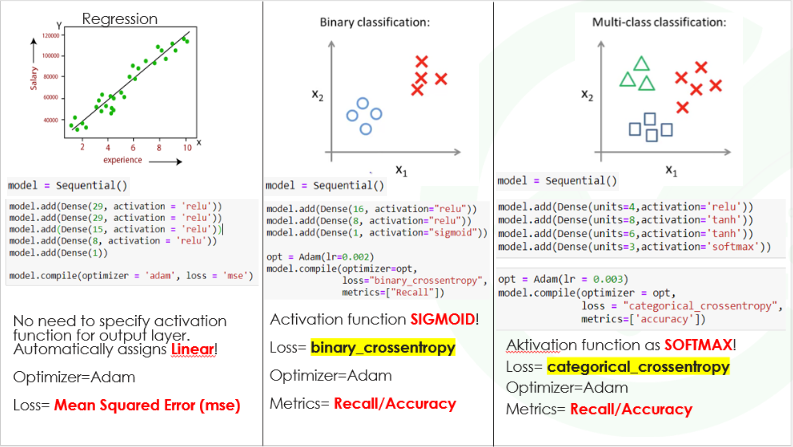

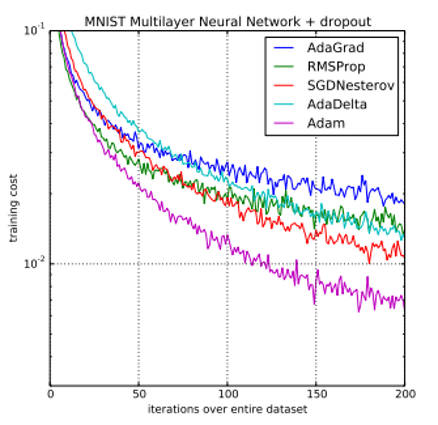

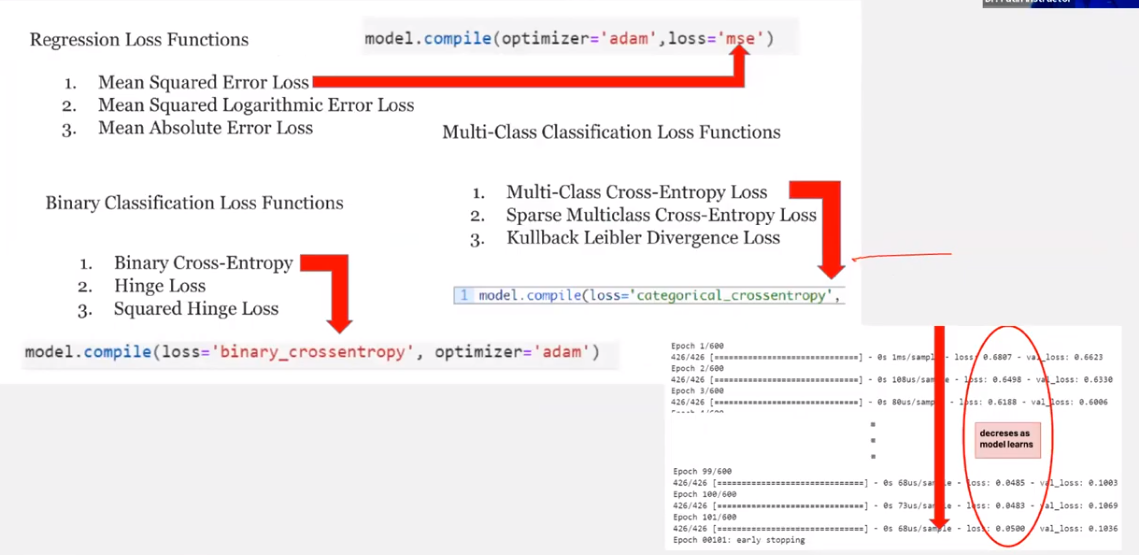

The scaled **X_train** data is trained via the model's **fit()** method. **y_train** is the target variable and represents the outputs that the model needs to learn.

In general, you can use the trial-and-error method when selecting the **batch size**. By trying different batch sizes, you can observe the training performance and results of your models. Some commonly used batch size values are 16, 32, 64, and 128. You should choose the batch size while paying special attention to the size of your dataset and the complexity of your model.

In [35]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 1) # try with 10 as well, 20 and 50 as well

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255330.7188


In [36]:
model.weights 

[<KerasVariable shape=(2, 4), dtype=float32, path=sequential_2/dense_8/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_8/bias>,
 <KerasVariable shape=(4, 4), dtype=float32, path=sequential_2/dense_9/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_9/bias>,
 <KerasVariable shape=(4, 4), dtype=float32, path=sequential_2/dense_10/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_10/bias>,
 <KerasVariable shape=(4, 1), dtype=float32, path=sequential_2/dense_11/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_2/dense_11/bias>]

In [37]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 200) 


Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 258416.7344
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 254728.3125  
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 261193.7656
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 259983.2969
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 246998.4531
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 260191.6406
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 255271.3750
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 261943.2656
Epoch 9/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 255848.8750
Epoch 10/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 253530.2188
Epoch 11/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 252198.2344
Epoch 12/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 256405.9219
Epoch 13/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 256107.5000
Epoch 14/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 27098.3418
Epoch 78/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 22047.4082
Epoch 79/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 18020.7539
Epoch 80/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 14737.3604
Epoch 81/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 11618.8740
Epoch 82/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 8485.1758
Epoch 83/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 6098.8740
Epoch 84/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 4248.0015
Epoch 85/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 3008.5967
Epoch 86/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 2552.3677
Epoch 87/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 2198.1826
Epoch 88/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 2083.7695
Epoch 89/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 2116.3535
Epoch 90/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 2037.4790


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 277.54879
Epoch 155/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 270.5795
Epoch 156/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 253.6097
Epoch 157/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 244.1507
Epoch 158/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 226.4406
Epoch 159/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 211.3453
Epoch 160/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 206.3133
Epoch 161/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 187.4718
Epoch 162/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 192.3538
Epoch 163/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 162.0163
Epoch 164/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 155.6548
Epoch 165/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 147.7267
Epoch 166/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 132.2818
Epoch 167/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 130.4293
Epoch 168/2

**When an epoch is completed, the average of the loss values from all batches forms the epoch loss value.**

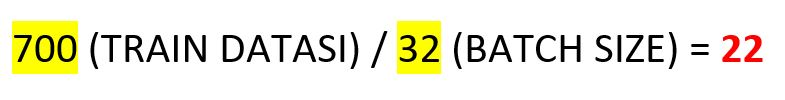

The number of iterations can be calculated by dividing the number of examples in the dataset by the batch size. In this case:

Since there are 700 data examples and a batch size of 32, the number of iterations is calculated as:

700 / 32 = 21.875

Since the batch size must be a whole number, an additional iteration will be made for the remaining examples in the last iteration. So the total number of iterations will be 22.

In [38]:
model.summary()  # Provides the number of parameters in each layer


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116 (468.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59 (240.00 B)

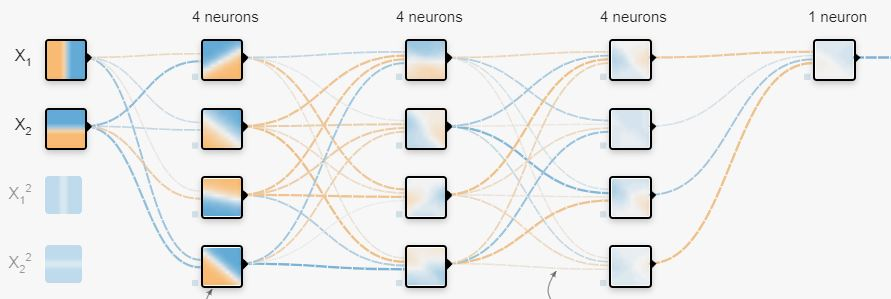

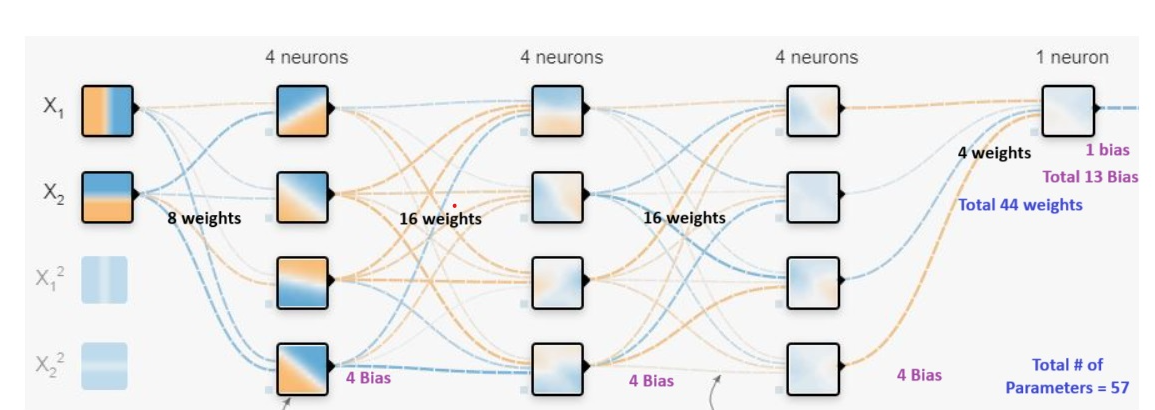

The expression **"model.weights"** contains the weights obtained as a result of training. To store the initial weights (which are usually randomly assigned), you need to use a separate function.

When you create an ANN model, the weights in the model are typically assigned randomly at the beginning. These randomly assigned weights allow the model to make predictions using the input data. However, since the predictions will often be incorrect, the model is fed with training data, and during training, the weights are gradually adjusted to enable better predictions. By the time training is complete, the final weights of the model are adjusted to best fit the training data.

In Keras, you can access a model's weights using the **get_weights()** method. This method returns a list of weights and biases as NumPy arrays. To obtain the weights before training, you can call the **get_weights()** method before the model is trained and save the weights. These weights can later be compared with the post-training weights. Alternatively, you can use the **save_weights()** method to save the model's weights, and a saved version of the pre-training weights can be restored using the **load_weights()** method.

In [39]:
model.get_weights()

[array([[ 1.2459486 ,  2.5767324 ,  0.9029755 ,  0.25040805],
        [ 3.8650103 ,  2.310338  ,  3.131157  , -0.98616934]],
       dtype=float32),
 array([ 0.78879625,  0.80726016,  0.55213076, -0.13575785], dtype=float32),
 array([[ 2.168287  , -0.96571314,  2.8366098 ,  2.834247  ],
        [ 2.4299762 ,  0.6411478 ,  2.3162475 ,  2.3656564 ],
        [ 2.3351433 ,  0.3313016 ,  2.352647  ,  1.4924275 ],
        [-0.56898874, -0.6781085 ,  0.7798062 ,  0.0046813 ]],
       dtype=float32),
 array([0.779232 , 0.9050601, 0.7858374, 0.7666558], dtype=float32),
 array([[ 0.6875835 , -0.22192782,  2.920314  , -0.09368545],
        [ 1.9216645 ,  0.23230702, -2.0688999 , -0.27770454],
        [ 0.1367121 , -0.84945464,  2.2039149 , -0.5605334 ],
        [-0.8826143 , -0.46278888,  2.7156646 ,  0.5112917 ]],
       dtype=float32),
 array([1.0628009 , 0.        , 0.76004523, 0.        ], dtype=float32),
 array([[-1.7205842 ],
        [ 0.87273383],
        [ 2.790749  ],
        [ 0.78660786

In [40]:
model.weights                                    

[<KerasVariable shape=(2, 4), dtype=float32, path=sequential_2/dense_8/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_8/bias>,
 <KerasVariable shape=(4, 4), dtype=float32, path=sequential_2/dense_9/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_9/bias>,
 <KerasVariable shape=(4, 4), dtype=float32, path=sequential_2/dense_10/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_10/bias>,
 <KerasVariable shape=(4, 1), dtype=float32, path=sequential_2/dense_11/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_2/dense_11/bias>]

- If you only want to get the weights of your model as a list of NumPy arrays, you can use: **model.weights**.

- If you want to access the weights of each layer of your model separately, you can use: **model.get_weights()**.

In [41]:
model.history.history  # Provides the loss values during model training


{'loss': [256559.453125,
  256452.828125,
  256327.8125,
  256180.5,
  256006.0625,
  255802.234375,
  255566.265625,
  255296.046875,
  254990.109375,
  254647.15625,
  254266.109375,
  253846.109375,
  253382.265625,
  252872.15625,
  252317.046875,
  251709.140625,
  251048.828125,
  250319.15625,
  249522.8125,
  248651.40625,
  247704.34375,
  246679.109375,
  245566.65625,
  244368.40625,
  243075.65625,
  241692.453125,
  240219.015625,
  238639.0,
  236949.375,
  235156.15625,
  233247.90625,
  231227.8125,
  229092.9375,
  226837.6875,
  224459.90625,
  221926.171875,
  219287.296875,
  216517.03125,
  213617.234375,
  210565.28125,
  207365.828125,
  204030.265625,
  200557.84375,
  196925.421875,
  193172.875,
  189253.140625,
  185211.75,
  181020.71875,
  176665.859375,
  172168.34375,
  167537.71875,
  162747.390625,
  157880.53125,
  152856.796875,
  147693.59375,
  142421.296875,
  137060.390625,
  131572.671875,
  125979.1171875,
  120308.328125,
  114567.359375,
  108

The **model.history.history** attribute is a dictionary containing all the values recorded during the model's training process. These values include the loss (or other metrics) recorded during training. This dictionary has an entry for each epoch recorded during training.

By using the code **pd.DataFrame(model.history.history)**, you can display this dictionary in a Pandas DataFrame format. Running this code allows you to see the loss values (and other metrics) for each epoch in a more organized and readable format. The values for each epoch are displayed in each row of the DataFrame.

In [42]:
pd.DataFrame(model.history.history)

,loss
0,256559.453
1,256452.828
2,256327.812
3,256180.500
4,256006.062
5,255802.234
6,255566.266
7,255296.047
8,254990.109
9,254647.156


<Axes: >

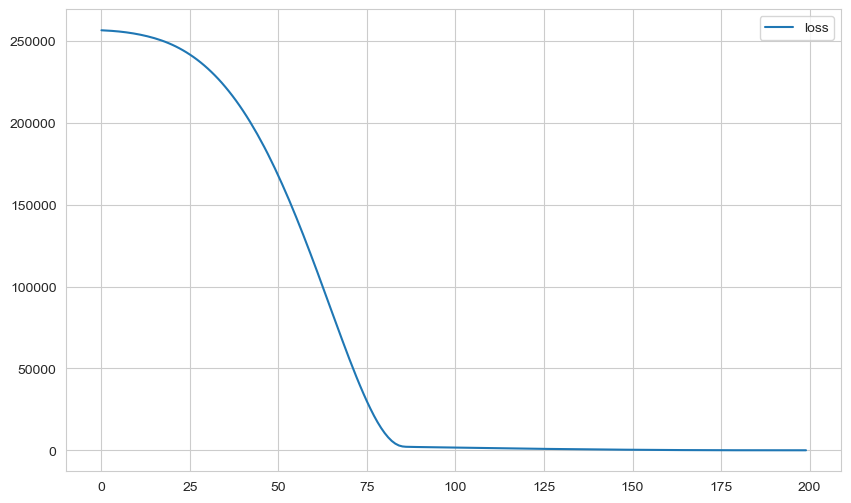

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()


(0.0, 3000.0)

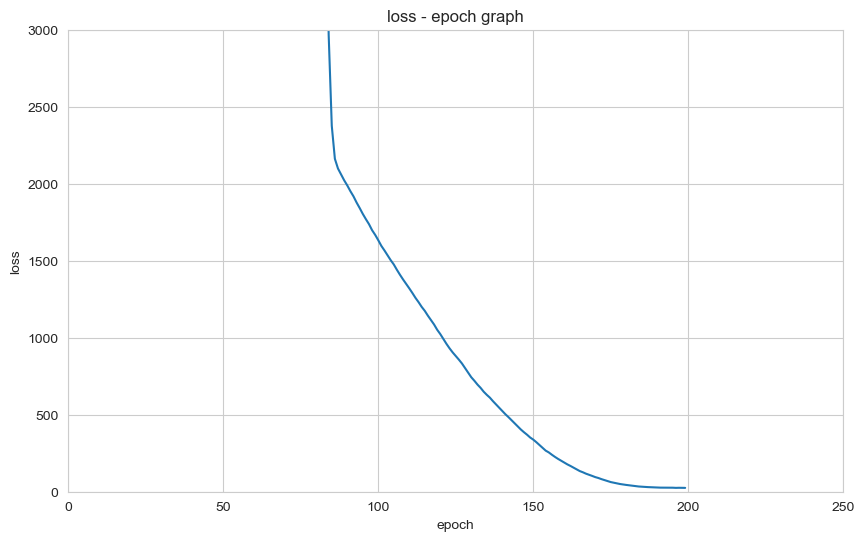

In [44]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

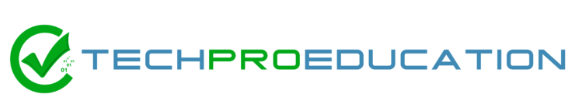

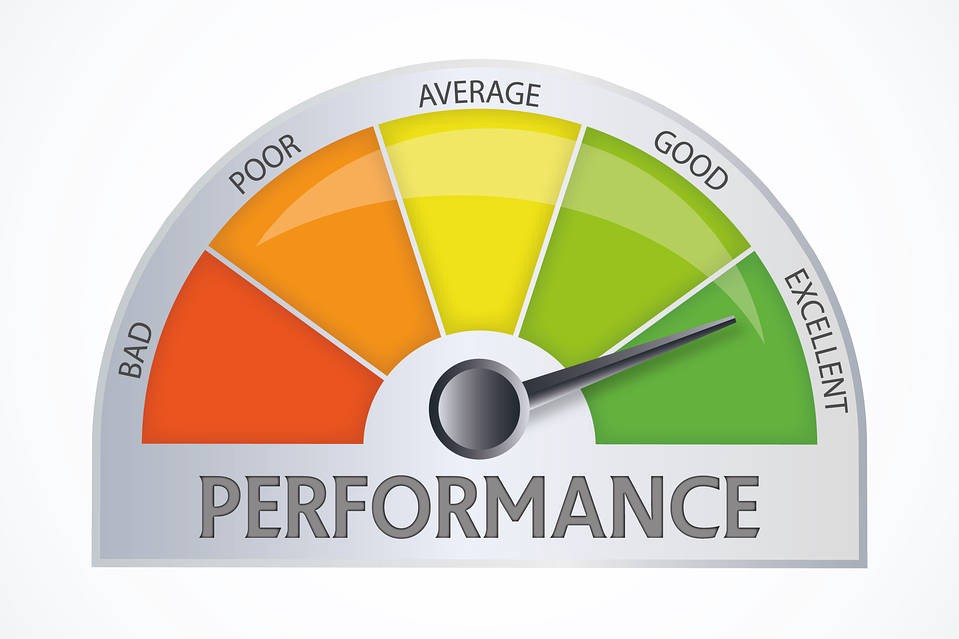

## Model Performance

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [46]:
model.evaluate(X_train, y_train, verbose=0)  # Returns the result for the loss function specified during model creation, in this case "mse"
                                             # In the background, it predicts using x and y, and then provides the evaluation result.

24.241151809692383

In [47]:
model.evaluate(X_test, y_test, verbose=0)      # The performance of the trained model on the test data

25.542217254638672

In [48]:
model.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - 2ms/step - loss: 25.5422


25.542217254638672

In [49]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [50]:
explained_variance_score(y_test, y_pred)     # gives the R2 score, good if closer to 1

0.9971059746195152

This code block is used to calculate the "explained variance score," a metric used to measure the accuracy of a machine learning model's predictions on test data.

In [51]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

# comparing actual and predicted values

,Actual,Pred
19,565.192,565.100
147,551.560,542.808
35,418.457,418.730
183,556.832,560.485
263,439.090,434.050
76,497.723,506.935
143,357.296,358.395
251,434.275,428.219
287,383.934,389.714
89,487.188,488.971


<Axes: xlabel='Actual', ylabel='Pred'>

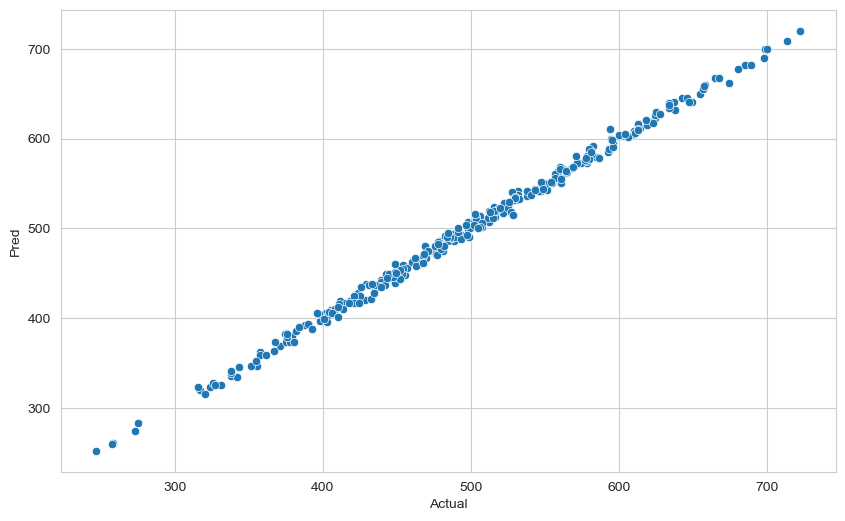

In [52]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

This code block creates a scatter plot that shows the relationship between the actual and predicted values. If the model has made accurate predictions, the points on the scatter plot are expected to be positioned close to a line.

In [53]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [54]:
eval_metric(y_test, y_pred)

r2_score: 0.9970948440662046 
mae: 4.091981204269419 
mse: 25.542222962890108 
rmse: 5.053931436306799


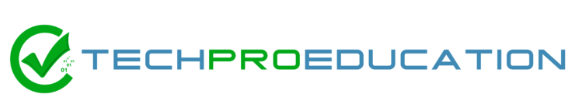

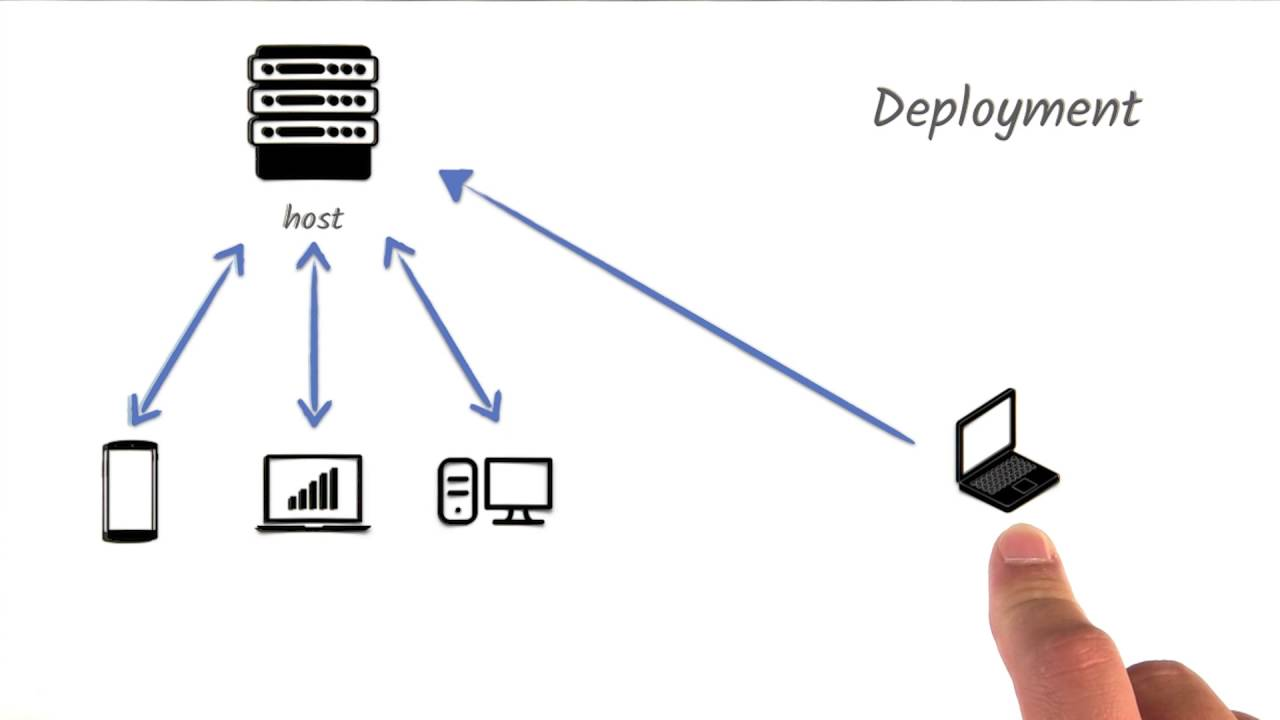

## Final Model and Model Deployment

In [55]:
scaler = MinMaxScaler().fit(X)    # In the final model, data scaling is necessary.

In [56]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

You can think of **Pickle** as a kind of "data preserver." It packages the data you provide in a special format and stores it in a file or stream. Then, when needed, you can unpack it to retrieve the data again. This is a very useful method for saving and transporting data.

It aims to serialize a **MinMaxScaler** object (named "scaler") using the **pickle** module in Python and write it to a file called **"scaler_fake_reg"**. This allows us to reload the scaler object when we want to reuse the model.

In [57]:
X_scaled = scaler.transform(X)

In the final model, after performing data scaling using **MinMaxScaler**, the scaled version of the data needs to be obtained. This ensures that the model uses the scaled data during training on the training set, and applying the same scaling process on the test data maintains consistency.

Therefore, using the **"transform"** function with the **"scaler"** object, the scaled version of the dataset **"X"**, called **"X_scaled"**, is obtained. This ensures that while preserving the original range of each feature, the features are scaled to similar ranges.

In [58]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 252428.7031   
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 255546.8594
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 256869.98446
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 256609.2812
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 258470.2812
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 249940.6719
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 256980.5469
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 256409.9219
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 256211.5938
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 260952.6250
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 251341.0781
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 256303.5938
Epoch 13/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 258601.3594
Epoch 14/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 957u

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 104915.8672
Epoch 78/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 103817.9531
Epoch 79/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 100801.9688
Epoch 80/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 90853.2266
Epoch 81/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 85830.2344 
Epoch 82/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 81519.5000
Epoch 83/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 73473.3281
Epoch 84/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 68866.2578
Epoch 85/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 64079.9805 
Epoch 86/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 57155.2070
Epoch 87/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 53650.1289
Epoch 88/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 46573.8320
Epoch 89/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 41053.7930
Epoch 90/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss:

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 1020.2361
Epoch 154/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 954.2339
Epoch 155/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 1016.4238
Epoch 156/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 924.4525
Epoch 157/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 888.1389
Epoch 158/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 897.3681
Epoch 159/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 884.0843
Epoch 160/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 826.8002
Epoch 161/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 806.0110
Epoch 162/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 806.0970
Epoch 163/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 815.7110
Epoch 164/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 746.6696  
Epoch 165/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 754.7766
Epoch 166/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 729.0510 
Epo

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 31.5328
Epoch 231/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 31.5052 
Epoch 232/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 29.5509
Epoch 233/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 28.2896 
Epoch 234/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 29.0033
Epoch 235/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 26.9924
Epoch 236/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 25.8960
Epoch 237/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 29.3013
Epoch 238/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 25.8437
Epoch 239/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 24.3589
Epoch 240/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 25.7762
Epoch 241/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 26.8687
Epoch 242/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 26.3701
Epoch 243/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 27.3759
Epoch 244/300
32/3

In [59]:
final_model.save('my_model.h5')                  
# Previously, while saving with the H5 extension, it stopped working in the new update.
# We resolved this issue using the Keras extension.
# The warning below also indicates that the H5 extension is an old method.

In [60]:
from tensorflow.keras.saving import save_model

save_model(final_model, 'my_model.keras')

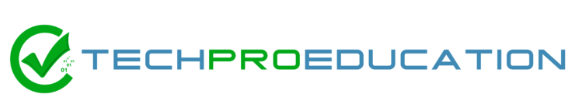

# Prediction-1

In [61]:
from tensorflow.keras.models import load_model

model_fake_reg = load_model('my_model.keras')

In [62]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

This code allows loading an object from a file (usually saved in a previous run) using the **pickle** module in Python. The example here aims to load a scaler object from a file named **"scaler_fake_reg"**.

In [63]:
sample = [[998, 1000]]    # Create a sample data manually

In [64]:
sample_scaled = scaler_fake_reg.transform(sample)     # scale this sample data

In [65]:
model_fake_reg.predict(sample_scaled)                 # predict the sample

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[419.8427]], dtype=float32)

# Prediction-2

In [66]:
my_dict = {"Feature1": [1020, 1908, 999, 1000, 1001],   # We can make predictions with multiple values.
           "Feature2": [1000, 999, 998, 997, 996]}      # Since we scaled the data, it will return the result as an array, so there's no need to convert it to an array.

In [67]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,1020,1000
1,1908,999
2,999,998
3,1000,997
4,1001,996


In [68]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[ 3.73060091e+00,  5.29806193e-01],
       [ 1.48130555e+02,  3.53459774e-01],
       [ 3.15737133e-01,  1.77113355e-01],
       [ 4.78349694e-01,  7.66936000e-04],
       [ 6.40962255e-01, -1.75579483e-01]])

In [69]:
model_fake_reg.predict(sample_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[ 1302.1232 ],
       [36779.703  ],
       [  282.95908],
       [  234.60208],
       [  186.24506]], dtype=float32)

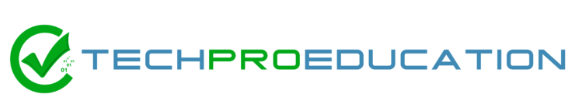